# **Dependências do Projeto**

In [79]:
%pip install torch torchvision torchaudio
#Instalando o pytorch

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Caso não consiga pydirectinput
%pip install pyautogui

     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing met

In [ ]:
#Biblioteca de aprendizado por reforço
%pip install stable-baselines3[extra] protobuf==3.20.*

  Using cached stable_baselines3-1.7.0-py3-none-any.whl (171 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Using cached importlib_metadata-4.13.0-py3-none-any.whl (23 kB)
  Using cached gym-0.21.0-py3-none-any.whl
  Using cached rich-13.3.1-py3-none-any.whl (239 kB)
     ---------------------------------------- 5.6/5.6 MB 5.2 MB/s eta 0:00:00
  Using cached AutoROM-0.4.2-py3-none-any.whl (16 kB)
  Using cached ale_py-0.7.4-cp39-cp39-win_amd64.whl (904 kB)
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached importlib_resources-5.10.2-py3-none-any.whl (34 kB)
  Using cached AutoROM.accept-rom-license-0.5.4.tar.gz (12 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished wit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [ ]:
%pip install mss pydirectinput pytesseract

     ---------------------------------------- 76.8/76.8 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install

# **Imports**

In [1]:
#Para captura de tela
from mss import mss
#import pyautogui #para comandos de teclado
import cv2 
#Tratamentos dos frames
import numpy as np 
import pyautogui
#Framework intermediário paara trabalhar com as imagens
#import pytesseract #para extrair o game over da imagem
from matplotlib import pyplot as plt #Visualizando resultados
import time
from PIL import Image
#Coisas para construir o ambinete
from gym import Env
from gym.spaces import Box, Discrete

In [2]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback
# Verificando se o ambiente é válido para fazer as coisa
from stable_baselines3.common import env_checker

In [3]:
from stable_baselines3 import DQN,PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

# **Construindo o Ambiente**

In [5]:
#Classe para definir o ambiente
class WebGame(Env):
    #ESSAS FUNÇÃO SÃO NECESSÁRIAS POR CONTA DO GYM
    #Função responsavel pela inicialização do ambiente;
    #Portanto onde ficam todas as variaveis do ambiente, configuração das ações e da observação 
    def __init__(self):
        super().__init__()

        #Configuração do espaço
        self.observation_space = Box(low=0, high=255, shape=(1,83,200), dtype=np.uint8)
        self.action_space = Discrete(3)

        #Variavei para a captura de tela
        self.screen_cap = mss() #Lib de captura de tela
        self.game_location = {"top": 300, "left": 0, "width": 650, "height": 500} #Área do monitor com 
        self.game_done = {"top": 40, "left": 0, "width": 800, "height": 640}

        self.first_image = np.zeros(5)
        self.last_image = np.zeros((500,650,3))

    #Função responsavel por passar as ações pro jogo, para fazer algo pro jogo
    def step(self, action):
        #Dicionário de ações pra n ficar um monte de if
        action_dict = {
            0:'down',
            1:'up',
            2:'nothing'
        }
        # Se ação escolhida for um dos botões, relizar a ação.
        if action != 2:    
            pyautogui.press(action_dict[action])
        
        #Checa a próxima ação
        observation = self.get_observation()
        #Todas as ações tem que verificar se a ação acabou
        done, done_cap = self.get_done() 
        #Ganhamos 1 ponto por cada frame que estamos vivos.
        reward = 1 if not done else -100
        info = {}

        return observation, reward, done, info
        

    #Função para a visualização do jogo:
    def render(self):
        cv2.imshow('Game', np.array(self.cap.grab(self.game_location))[:,:,:3])
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()

    #Função responsavel por recomeçar o jogo
    def reset(self):
        time.sleep(1)
        pyautogui.click(x=150, y=150)
        pyautogui.press('space')
        return self.get_observation()
   
    #Fecha a parte de visualização
    def close(self):
        cv2.destroyAllWindows()
    
    #FUNÇÕES CUSTOM
    #Função responsavel por pegar a imagem do jogo e tratar da forma necessária.
    def get_observation(self): 

        #img = numpy.array(self.screen_cap.grab(game_location))[:,:,3].astype(np.uint8)
        raw = np.array(self.screen_cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (200,83))
        channel = np.reshape(resized, (1,83,200))
        #imgRaw = self.screen_cap.grab(self.game_location)
        #img = Image.frombytes("RGB", imgRaw.size, imgRaw.bgra, "raw", "BGRX").convert("L")
        #Pegando nesse ponto para evitar a imagem cortada.
        self.first_image = self.last_image
        self.last_image = raw
        #gray = cv2.cvtColor(imgRaw, cv2.COLOR_BGR2GRAY)
        #cropped_img = cv2.resize(img, (100,83))
        #cropped_img.resize((100, 83)) #Tamanhos a definir ainda.
        #data = np.asarray(cropped_img) #troquei pra uint8, pois queria diminuir mais ainda o tamanho.
        #data = np.reshape(cropped_img, (1,83,100)) # For stable baselines having a better structure
        

        return channel

    #Função para pegar o texto de fim de jogo:
    def get_done(self):
        #Se as duas imagens iniciais forem iguais acabou jogo
        done = False
        #Colando a primeira condição devido ao fator de que as formas diferentes estavam dando problema na comparação devido ao np.all
        if self.first_image.shape[0] != self.last_image.shape[0]:
            return done, self.last_image

        if np.all(np.equal(self.first_image, self.last_image)):
            done = True
        
        return done, self.last_image

### Teste de Funções do Ambiente

In [6]:
env = WebGame()

In [ ]:
#Teste para a captura de Imagem
teste = env.get_observation()

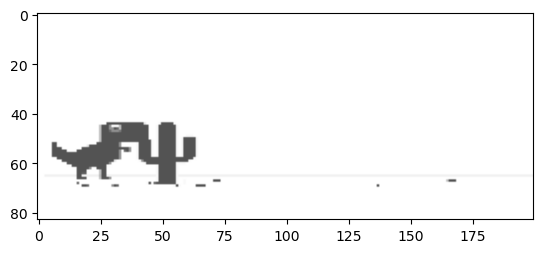

In [ ]:
#Mostrando a imagem capturada
plt.imshow(cv2.cvtColor(teste[0], cv2.COLOR_GRAY2BGR))

In [ ]:
#Teste para ver se o jogo acaba
env.get_observation()
done, done_cap = env.get_done()

time.sleep(0.1)

env.get_observation()
done, done_cap = env.get_done()

True


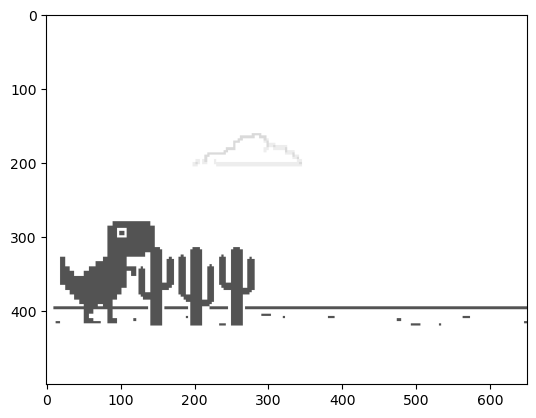

In [ ]:
#Mostrando uma imagem de fim de jogo
print(done)
plt.imshow(done_cap)

In [7]:
#10 partidas
for episode in range(10): 
    obs = env.reset()
    done = False  
    total_reward = 0
    while not done: 
        obs, reward,  done, info =  env.step(env.action_space.sample()) #
        total_reward  += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))   

Total Reward for episode 0 is -99
Total Reward for episode 1 is -77
Total Reward for episode 2 is -74
Total Reward for episode 3 is -96
Total Reward for episode 4 is -41
Total Reward for episode 5 is -42
Total Reward for episode 6 is -20
Total Reward for episode 7 is -41
Total Reward for episode 8 is -53
Total Reward for episode 9 is -7


# Treinamento

In [1]:
# Verificando se o ambiente é válido para fazer as coisa
env_checker.check_env(env)

NameError: name 'env_checker' is not defined

In [17]:
#Salvando o modelo em uma pasta chamado de treino
#Ele também define quand
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        #output_formats = self.logger.output_formats
        #self.tb_formatter = next(formatter for formatter in output_formats if isinstance(formatter, TensorBoardOutputFormat))

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    #Lembrar de alterar o nome do arquivo salvo para o modelo utilizado. Caso esse modelo seja diferente.
    def _on_step(self):
        
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_DQN_{}'.format(self.n_calls))
            self.model.save(model_path)
            # rewards = self.locals['my_custom_info_dict']['my_custom_reward']
            # for i in range(self.locals['env'].num_envs):
            #     self.tb_formatter.writer.add_scalar("rewards/env #{}".format(i+1),rewards[i],self.n_calls)

        return True

In [14]:
#Criandos as pastas para que funcione.
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [18]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

In [21]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=12000, learning_starts=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
model2 = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=1e-6, n_steps=512)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [19]:
model3 = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=12000, learning_starts=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [20]:
env = WebGame()

In [ ]:
model3.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/DQN_8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5        |
|    time_elapsed     | 11       |
|    total_timesteps  | 66       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33       |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7        |
|    time_elapsed     | 34       |
|    total_timesteps  | 264      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.8     |
|    ep_rew_mean      | 35.8     |
|    exploration_rate | 0.959    |
| time/               |        

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [22]:
#Começa o treinamento
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/DQN_9
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54       |
|    ep_rew_mean      | -47      |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7        |
|    time_elapsed     | 27       |
|    total_timesteps  | 216      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.6     |
|    ep_rew_mean      | -51.4    |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8        |
|    time_elapsed     | 49       |
|    total_timesteps  | 397      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | -47.2    |
|    exploration_rate | 0.939    |
| time/               |        

KeyboardInterrupt: 

In [ ]:
model2.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 58.6     |
|    ep_rew_mean     | 58.6     |
| time/              |          |
|    fps             | 10       |
|    iterations      | 1        |
|    time_elapsed    | 48       |
|    total_timesteps | 512      |
---------------------------------


KeyboardInterrupt: 

In [ ]:
model.load('train/best_model_10000') 

MemoryError: Unable to allocate 15.5 GiB for an array with shape (1000000, 1, 1, 83, 200) and data type uint8

In [ ]:
for episode in range(10): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(int(action))
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))

Total Reward for episode 0 is 16
Total Reward for episode 1 is 33
Total Reward for episode 2 is 49
Total Reward for episode 3 is 30
Total Reward for episode 4 is 7
Total Reward for episode 5 is 30
Total Reward for episode 6 is 12
Total Reward for episode 7 is 2
Total Reward for episode 8 is 91
Total Reward for episode 9 is 60
